In [ ]:
# 1. Importação de bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)


In [ ]:
# 1. Carregar DataFrame

def carregar_dataframe(path):
    return pd.read_csv(path)




In [ ]:
# 2. Preparar DataFrame

def preparar_dataframe(df):
    """
    Prepara os dados:
    - cria coluna aprovado
    - separa X e y
    - identifica colunas numéricas e categóricas
    """
    df["aprovado"] = (df["G3"] >= 10).astype(int)

    X = df.drop("aprovado", axis=1)
    y = df["aprovado"]

    numericas = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
    categoricas = X.select_dtypes(include=["object"]).columns.tolist()

    return X, y, numericas, categoricas



In [ ]:
# 3. Criar pipeline do modelo

def criar_modelo(numericas, categoricas):

    preprocess = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numericas),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categoricas)
        ]
    )

    mlp = MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        max_iter=1500,
        random_state=42
    )

    modelo = Pipeline([
        ("preprocessamento", preprocess),
        ("mlp", mlp)
    ])

    return modelo


In [ ]:
# 4. Avaliar modelo

def avaliar_modelo(modelo, X_test, y_test):

    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("ACURÁCIA: {:.2f}%".format(acc * 100))
    print("PRECISÃO: {:.2f}%".format(prec * 100))
    print("RECALL: {:.2f}%".format(rec * 100))
    print("F1-SCORE: {:.2f}%".format(f1 * 100))

    print("\nRELATÓRIO DE CLASSIFICAÇÃO:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Matriz de Confusão")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()



In [ ]:
# 5. Adicionar probabilidade no DataFrame

def adicionar_probabilidade(modelo, df):
    X = df.drop("aprovado", axis=1)
    df["probabilidade_aprovacao"] = (modelo.predict_proba(X)[:, 1] * 100).round(2)
    return df



ACURÁCIA: 97.50%
PRECISÃO: 96.30%
RECALL: 100.00%
F1-SCORE: 98.11%

RELATÓRIO DE CLASSIFICAÇÃO:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.96      1.00      0.98        52

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



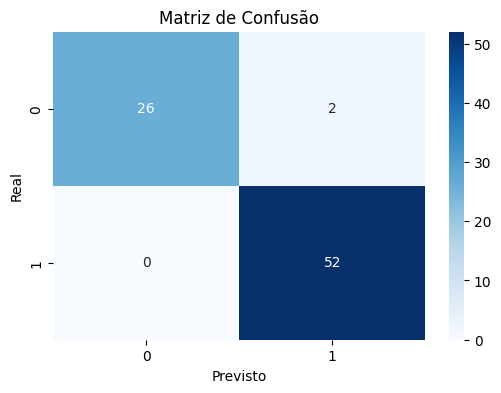

'# 7) adicionar probabilidade ao DataFrame\ndf = adicionar_probabilidade(modelo, df)\n\n# 8) salvar resultados\ndf.to_csv("resultado_com_probabilidade.csv", index=False)\n\nprint("\nArquivo salvo: resultado_com_probabilidade.csv")\nprint(df.head())'

In [ ]:

# 6. Execução da rede neural base de notas matematica


# 1) carregar dados
df = carregar_dataframe("Maths.csv")

# 2) preparar dados
X, y, numericas, categoricas = preparar_dataframe(df)

# 3) criar modelo
modelo = criar_modelo(numericas, categoricas)

# 4) dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42
)

# 5) treinar
modelo.fit(X_train, y_train)

# 6) avaliar
avaliar_modelo(modelo, X_test, y_test)



ACURÁCIA: 97.50%
PRECISÃO: 96.30%
RECALL: 100.00%
F1-SCORE: 98.11%

RELATÓRIO DE CLASSIFICAÇÃO:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.96      1.00      0.98        52

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



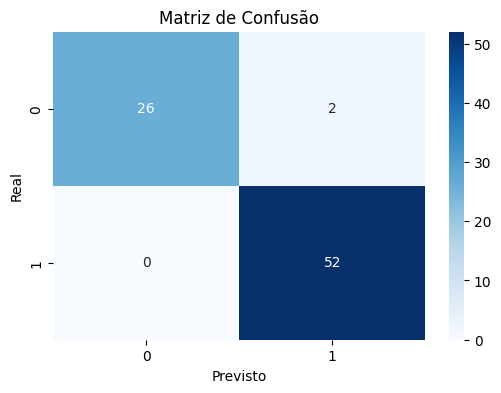

'# 7) adicionar probabilidade ao DataFrame\ndf = adicionar_probabilidade(modelo, df)\n\n# 8) salvar resultados\ndf.to_csv("resultado_com_probabilidade.csv", index=False)\n\nprint("\nArquivo salvo: resultado_com_probabilidade_portugue.csv")\nprint(df.head())'

In [ ]:
# 7. Execução da rede neural base de notas matematica


# 1) carregar dados
df_math = carregar_dataframe("Portuguese.csv")

# 2) preparar dados
X, y, numericas, categoricas = preparar_dataframe(df)

# 3) criar modelo
modelo = criar_modelo(numericas, categoricas)

# 4) dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42
)

# 5) treinar
modelo.fit(X_train, y_train)

# 6) avaliar
avaliar_modelo(modelo, X_test, y_test)
